<a href="https://colab.research.google.com/drive/1GWsEqIDuIt3HR6ljwyzuA82DpXWQ5e9o" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MRI classification on morphometry data**

#### 1. Introduction

In this notebook we will do conventional morphometry analysis for gender-related morphometric sighns search.


**Our goal will be to build a network for MEN and WOMEN brain classification, to explore gender influence on brain structure and find gender-specific biomarkers.**

We will use the data from https://db.humanconnectome.org/data/projects/HCP_1200.

*Proceeding with this Notebook you confirm your personal acess [to the data](https://www.humanconnectome.org/study/hcp-young-adult/document/1200-subjects-data-release). 
 And your agreement on data [terms and conditions](https://www.humanconnectome.org/study/hcp-young-adult/data-use-terms).*


You can use plug-and-play grid seach pipleine from https://github.com/kondratevakate/neurobot

2. Mounting Google Drive to Collab Notebook. You should go with the link and enter your personal authorization code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**!!! Add a shortcut** with "Add a shortcut" with the `data` repository from here https://drive.google.com/drive/folders/1zajXzS7dMwaBrhauhvRph2La1uOgP6jN?usp=sharing

After adding a shotcut change this data dir to yours own files location in Google drive and give a path to `seminars/anat` folder:

In [ ]:
data_dir = '/content/drive/My Drive/Skoltech Neuroimaging/NeuroML2020/data/seminars/anat/'

### Importing the data

Importing `unrestricted_freesurfer.csv` dataset from https://db.humanconnectome.org/data/projects/HCP_1200.

In [ ]:
import pandas as pd
data = pd.read_csv(data_dir + 'unrestricted_hcp_freesurfer.csv')

In [ ]:
data.head()

**How to get this morpometry data inhouse?**

1. You should have T1 weighted MRI, or T1 with T2.
2. Should have patients data in `BIDS` or converted in `*.nii`.
3. Run `fsdocker` or standalon installed `freesurfer 6.0`.
4. Wait 5-11 hours on 1 CPU per patient.
5. Get freesurfer stats as output and convert them in table format. 


The tutorial and data for table creation as well as data visualisation can be found here:
https://github.com/kondratevakate/your-brain-mri-visualization

### Defining train and test data

In is a set of brain morphometry measures of healthy young adults. On the data we have two classification plobles to solve:
- men/women classification.
- age above 30n classification.

Choose your X (train_data) and y (train_targets) as `pandas.DataFrame()` or  `numpy.array()`:

In [ ]:
X = data[data.columns[3:]]
y = data[data.columns[1]]
X.shape, y.shape

In [ ]:
y.value_counts()

Let's change `str` values to binary classes. The easy but BAD way is:

In [ ]:
y[y == 'F'] = 1
y[y == 'M'] = 0
y = y.astype(int)
y.value_counts()

### Let's do classical data analysis

**Statistics**:
1. Pick up a test for two grups comparison (gaussian/ parametric or not?)
2. Is it paired test or not?
3. Choose a p-value and address the multiple comparisons.


What about feature selection?

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [ ]:
from sklearn.feature_selection import SelectKBest
X_new = SelectKBest(k=10).fit_transform(X, y)

In [ ]:
X.columns[SelectKBest(k=10).fit(X, y).get_support()]

In [ ]:
SelectKBest(k=10).fit(X, y).pvalues_[SelectKBest(k=10).fit(X, y).get_support()]

What do you know about multiple comparisons?


![graph](https://janhove.github.io/figs/2016-04-01-multiple-comparisons-scenarios/unnamed-chunk-1-1.png)

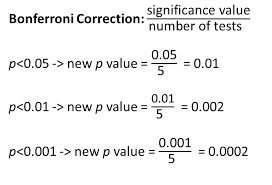

One bad paper to look at:
https://arxiv.org/pdf/1604.05992.pdf

And one good paper:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3056175/

## Now we are doing ML!
#### Defining model grid search. Defining new object of Grid Cross Validation Linear class:

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# will run for 1-2 minutes
lr_cv = LogisticRegressionCV(max_iter = 1000, random_state = 42, n_jobs = -1)
lr_cv.fit(X,y)

In [ ]:
lr_cv.scores_

## What else?

0. Hyperparameter search and model optimisation. Comparison of model performance with statistical testing.
1. Model interpretation
2. Biomarkers stability
3. Biomarkers statistical approval

How we can exploge gender morphometry biomarkers from here?

In [ ]:
lr_cv.coef_

How do we compare the performance of **two classificational models**?

https://www.jmlr.org/papers/volume7/demsar06a/demsar06a.pdf